<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/DT_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Early stopping of Gradient Boosting

Gradient boosting is an ensembling technique where several weak learners (regression trees) are combined to yield a powerful single model, in an iterative fashion.

Early stopping support in Gradient Boosting enables us to find the least number of iterations which is sufficient to build a model that generalizes well to unseen data.

The concept of early stopping is simple. We specify a validation_fraction which denotes the fraction of the whole dataset that will be kept aside from training to assess the validation loss of the model. The gradient boosting model is trained using the training set and evaluated using the validation set. When each additional stage of regression tree is added, the validation set is used to score the model. This is continued until the scores of the model in the last n_iter_no_change stages do not improve by atleast tol. After that the model is considered to have converged and further addition of stages is "stopped early".

The number of stages of the final model is available at the attribute n_estimators_.

This example illustrates how the early stopping can used in the :class:~sklearn.ensemble.GradientBoostingClassifier model to achieve almost the same accuracy as compared to a model built without early stopping using many fewer estimators. This can significantly reduce training time, memory usage and prediction latency.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
from sklearn.datasets import load_digits
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

* Load digits data set using load_digits()
* Train GradientBoostingCLassifier with and without early stopping
* Keep a timer for both cases and report the time it takes to train both models
* Report the scores for both models

In [ ]:
df = load_digits()

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = df['data']
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
gbc_no_early = GradientBoostingClassifier(n_estimators = 500, random_state = 0)

In [ ]:
gbc_early = GradientBoostingClassifier(n_estimators = 500, validation_fraction = 0.2, n_iter_no_change = 5, tol = 0.01, random_state = 0)

In [ ]:
start = time.time()
gbc_no_early.fit(X_train, y_train)
end = time.time()
time_no_early = end - start
n_estimators_no_early = gbc_no_early.n_estimators_

In [ ]:
gbc_no_early.score(X_train, y_train), gbc_no_early.score(X_test, y_test)

(1.0, 0.96)

In [ ]:
start = time.time()
gbc_early.fit(X_train, y_train)
end = time.time()
time_early = end - start
n_estimators_early = gbc_early.n_estimators_

In [ ]:
gbc_early.score(X_train, y_train), gbc_early.score(X_test, y_test)

(0.994060876020787, 0.9466666666666667)

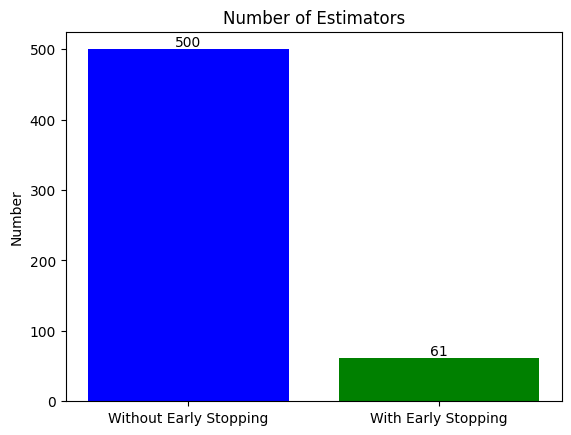

In [ ]:
bars1 = plt.bar(['Without Early Stopping', 'With Early Stopping'], [n_estimators_no_early, n_estimators_early], color = ['blue', 'green'])
plt.title('Number of Estimators')
plt.ylabel('Number')

for bar in bars1:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), va = 'bottom', ha = 'center')


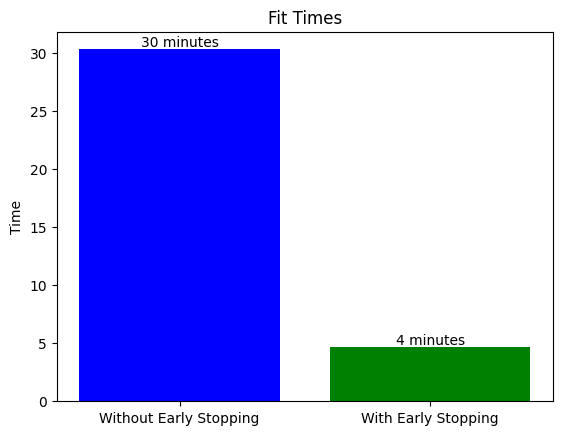

In [ ]:
bars2 = plt.bar(['Without Early Stopping', 'With Early Stopping'], [time_no_early, time_early], color = ['blue', 'green'])
plt.title('Fit Times')
plt.ylabel('Time')

for bar in bars2:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())} minutes', va = 'bottom', ha = 'center')